In [1]:
from pandas_datareader import data
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline

tickers = ['^HSI', '^N225', '^GDAXI','^DJI', '^IXIC' ]
start_date = '2014-12-22'
end_date = '2020-03-19'

#Pull data
df_ticker = []
for k,ticker in enumerate(tickers):
    df = data.DataReader(ticker, 'yahoo', start_date, end_date)
    df['relClose'] = df['Close'] /df['Close'].iloc[0]*100
    df_ticker.append(df)

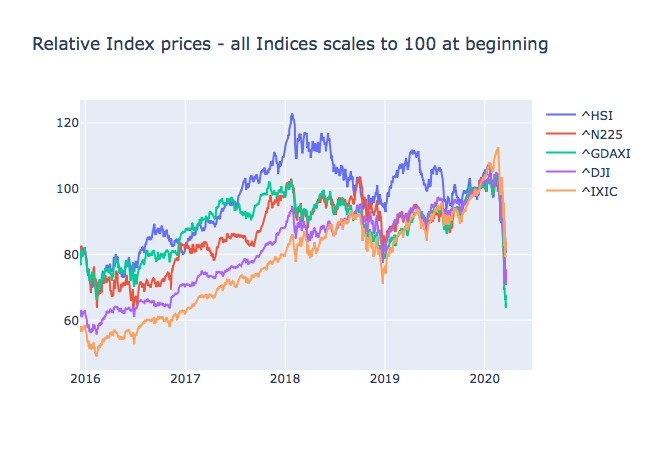

In [5]:
fig = go.Figure()
for k,ticker in enumerate(tickers):
    df = df_ticker[k]
    fig.add_trace(go.Scatter(x=df.index,  y=df['relClose'], name=ticker))
fig.update_layout(title="Relative Index prices - all Indices scales to 100 at beginning")
fig.update_xaxes(range=['2015-12-12', '2020-06-22'])
fig.show()

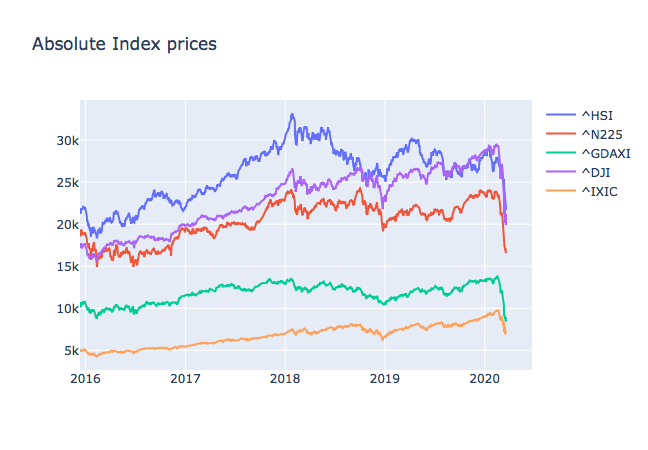

In [6]:
fig = go.Figure()
for k,ticker in enumerate(tickers):
    df = df_ticker[k]
    fig.add_trace(go.Scatter(x=df.index,  y=df['Close'], name=ticker))
fig.update_layout(title="Absolute Index prices")
fig.update_xaxes(range=['2015-12-12', '2020-06-22'])
fig.show()

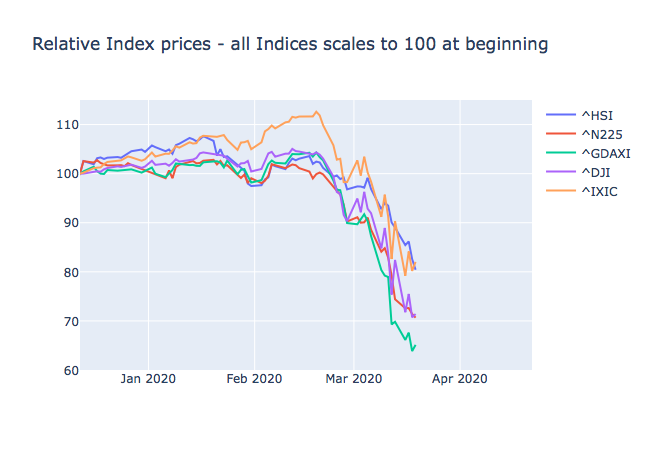

In [7]:
fig = go.Figure()
for k,ticker in enumerate(tickers):
    df = df_ticker[k]
    df['relClose'] = df['Close']/df.loc['2019-12-12'].Close*100
    fig.add_trace(go.Scatter(x=df.index,  y=df['relClose'], name=ticker))
fig.update_layout(title="Relative Index prices - all Indices scales to 100 at beginning")
fig.update_yaxes(range=[60, 115])
fig.update_xaxes(range=['2019-12-12', '2020-04-22'])
fig.show()